In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
from sklearn.datasets import load_wine
import mlgrad.pca as pca
from sklearn.preprocessing import robust_scale, scale

In [2]:
X0, Y = load_wine(return_X_y=True)
X0 = scale(X0)

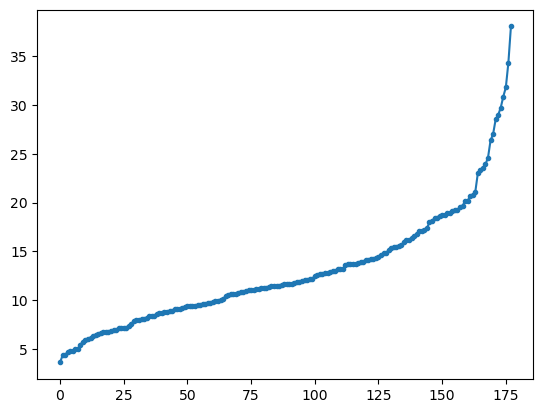

[ 7.84141790e-15  2.44498554e-16 -4.05917497e-15 -7.11041712e-17
 -2.49488320e-17 -1.95536471e-16  9.44313292e-16 -4.17892936e-16
 -1.54059038e-15 -4.12903170e-16  1.39838203e-15  2.12688793e-15
 -6.98567296e-17]


In [3]:
c0 = pca.find_center(X0)
plt.plot(sorted(pca.distance_center(X0, c0)), marker='o', markersize=3)
plt.show()
print(c0)

0.8876404494382022
[ 0.03930978  0.03658974  0.00524976 -0.06896618 -0.0646971  -0.0406118
 -0.04215895 -0.01415944 -0.0114888   0.10623655 -0.08244529 -0.05177754
  0.0017291 ]


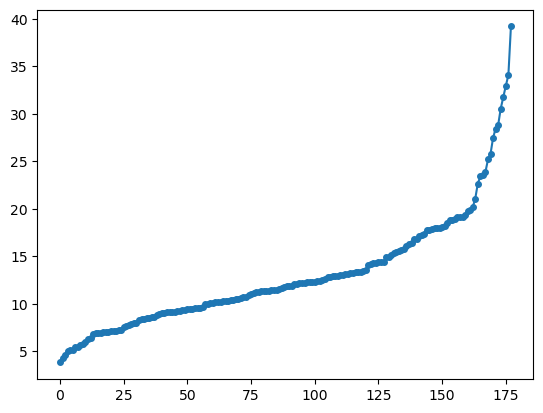

In [4]:
N = len(X0)
alpha = (N - 20) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=alpha)
c = pca.find_rob_center(X0, wma)
print(c)
plt.plot(sorted(pca.distance_center(X0, c)), marker='o', markersize=4)
plt.show()

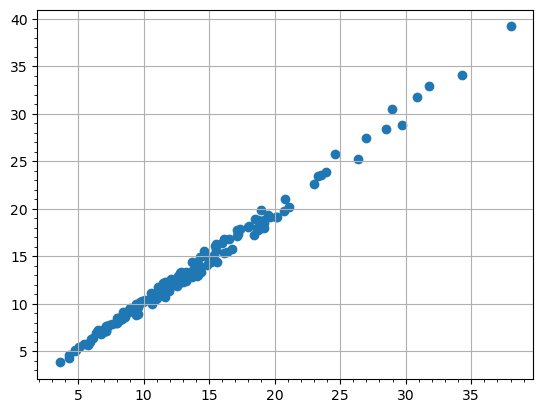

In [5]:
D0 = pca.distance_center(X0, c0)
D1 = pca.distance_center(X0, c)
plt.scatter(D0, D1)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [6]:
X1_0 = X0 - c0
X1 = X0 - c

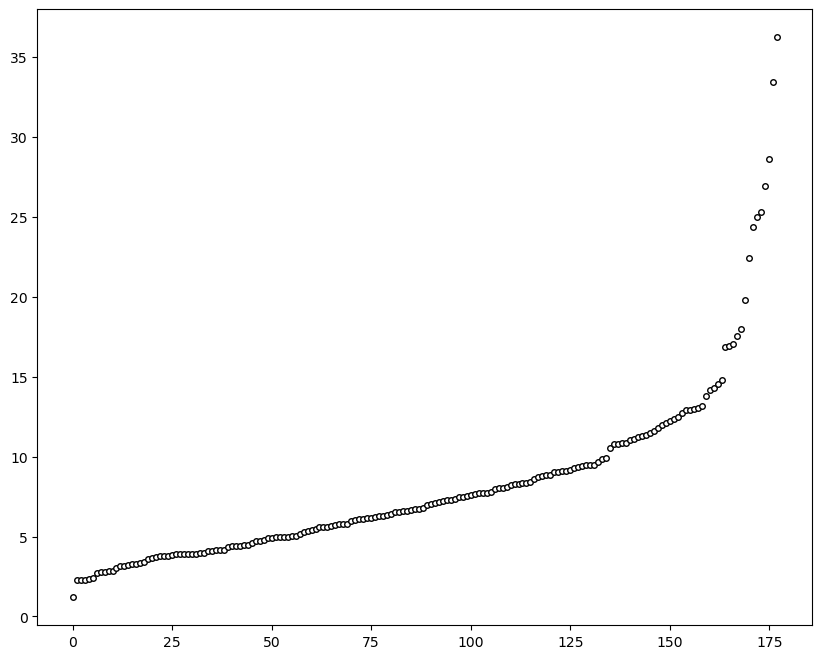

4.705850252990421 [ 0.14432941 -0.24518758 -0.00205105 -0.23932041  0.14199205  0.39466085
  0.4229343  -0.2985331   0.31342949 -0.08861669  0.29671456  0.37616741
  0.28675223]


In [7]:
a1_0, L1_0 = pca.find_pc(X1_0)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L1_0, a1_0)

0.8876404494382022
4.7218125127793185 [ 0.17407121 -0.2751892  -0.00872548 -0.25842254  0.07893472  0.39962189
  0.41721046 -0.30257038  0.28233522 -0.08465043  0.31393612  0.37213249
  0.26768018]


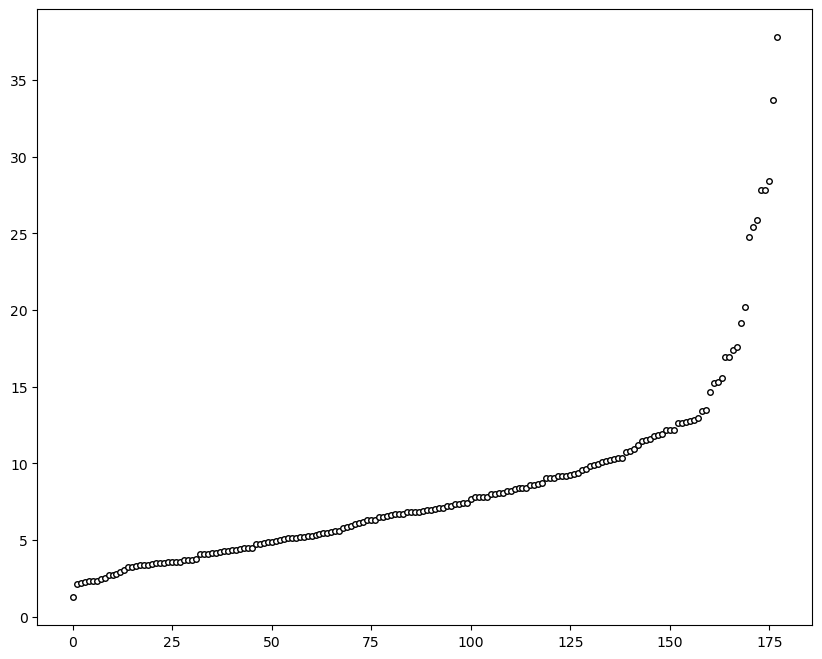

In [8]:
N = len(X0)
alpha = (N - 20) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=alpha)
a1, L1 = pca.find_rob_pc(X1, wma)
print(L1, a1)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X1, a1)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
U1 = pca.project_line(X0, a1)
U1_0 = pca.project_line(X0, a1_0)

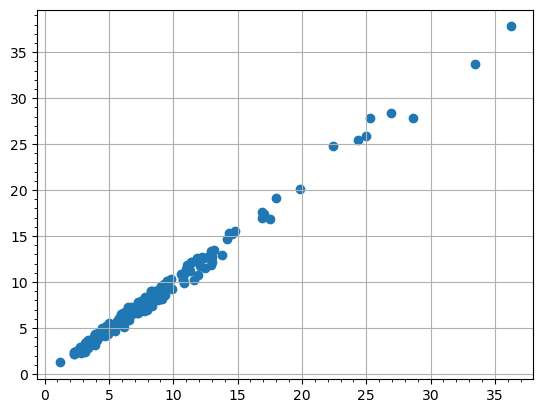

In [9]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [10]:
def find_pc_all(X0):
    Ls = []
    As = []
    Us = []
    n = X0.shape[1]
    X = X0
    for i in range(n):
        a, L = pca.find_pc(X)
        U = pca.project_line(X0, a)
        X = pca.project(X, a)
        Ls.append(L)
        As.append(L)
        Us.append(U)
    Ls = np.array(Ls)
    return As, Ls, Us
        
def find_rob_pc_all(X0, wma):
    Ls = []
    As = []
    Us = []
    n = X0.shape[1]
    X = X0
    for i in range(n):
        a, L = pca.find_rob_pc(X, wma)
        U = pca.project_line(X0, a)
        X = pca.project(X, a)
        Ls.append(L)
        As.append(L)
        Us.append(U)
    Ls = np.array(Ls)
    return As, Ls, Us


In [11]:
X2_0 = pca.project(X1_0, a1_0)
X2 = pca.project(X1, a1)

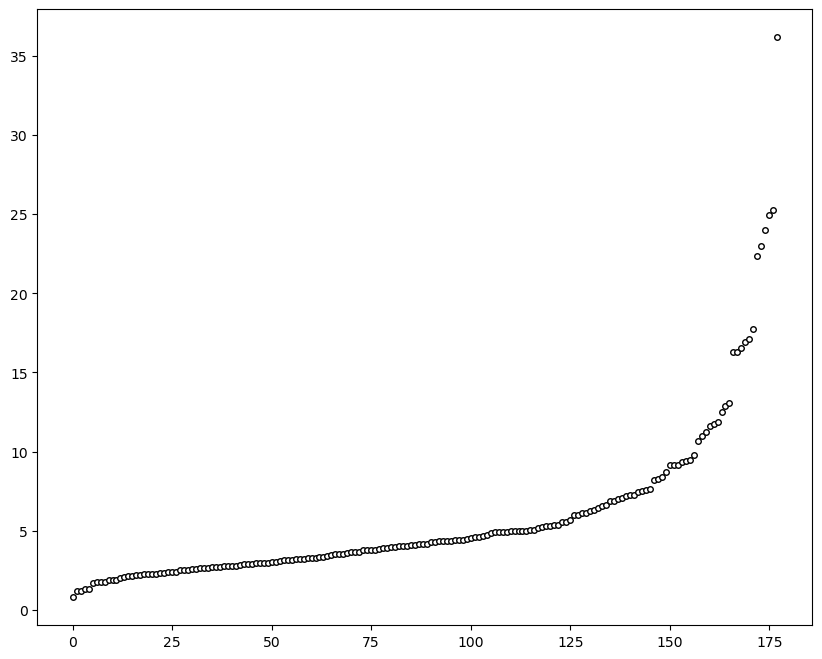

2.4969737334111635 [ 0.48365154  0.22493094  0.31606883 -0.01059048  0.299634    0.06503951
 -0.00335982  0.0287795   0.03930172  0.52999567 -0.27923515 -0.1644962
  0.36490282]


In [12]:
a2_0, L2_0 = pca.find_pc(X2_0)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X2_0, a2_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L2_0, a2_0)

0.8876404494382022


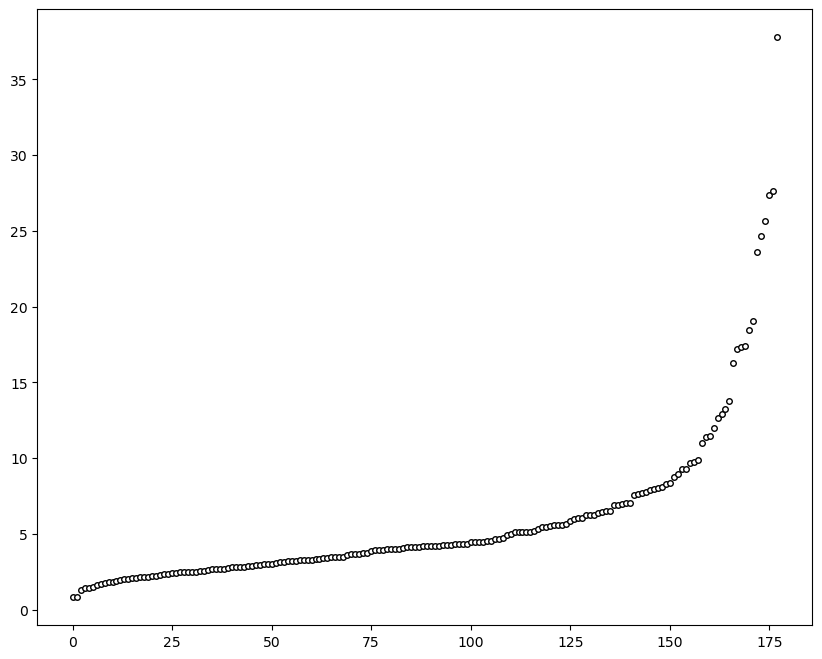

2.243417847989544 [ 0.47555833  0.22841682  0.29613395 -0.06107597  0.38135273  0.05087696
 -0.00534245 -0.01171216  0.00736179  0.47979583 -0.25706605 -0.18694909
  0.38829011]


In [13]:
N = len(X0)
alpha = (N - 20) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=alpha)
a2, L2 = pca.find_rob_pc(X2, wma)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X2, a2)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L2, a2)
U2 = pca.project_line(X0, a2)
U2_0 = pca.project_line(X0, a2_0)

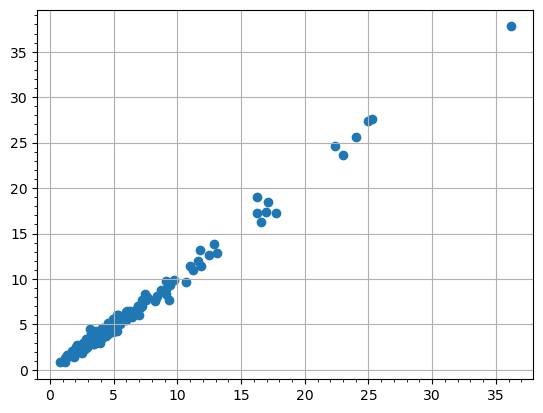

In [14]:
plt.scatter(pca.distance_line(X2_0, a2_0), pca.distance_line(X2, a2))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [15]:
X3_0 = pca.project(X2_0, a2_0)
X3 = pca.project(X2, a2)

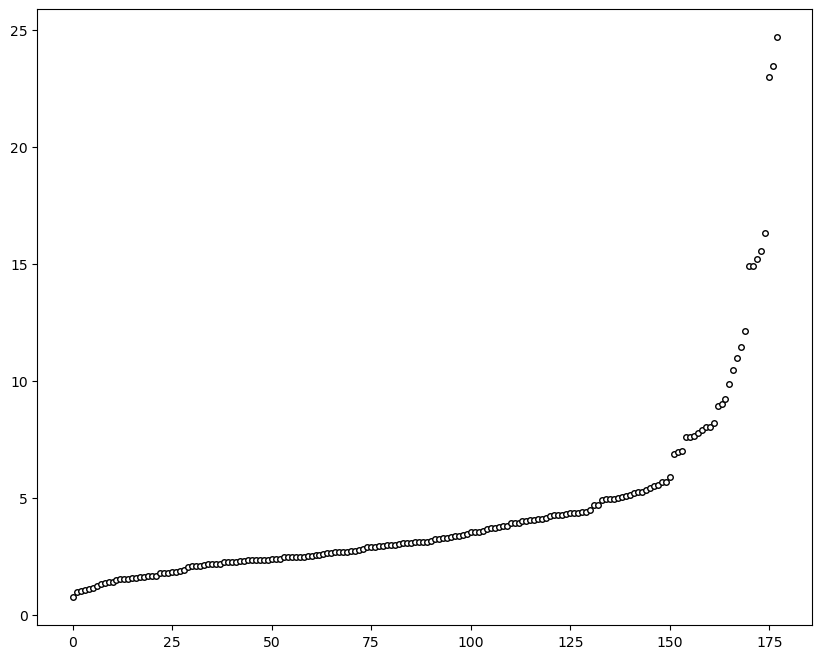

1.4460719697124975 [-0.20738264  0.0890129   0.62622388  0.61208035  0.13075691  0.14617897
  0.15068191  0.17036816  0.14945432 -0.13730623  0.08522192  0.1660046
 -0.12674594]


In [16]:
a3_0, L3_0 = pca.find_pc(X3_0)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X3_0, a3_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L3_0, a3_0)

0.8876404494382022


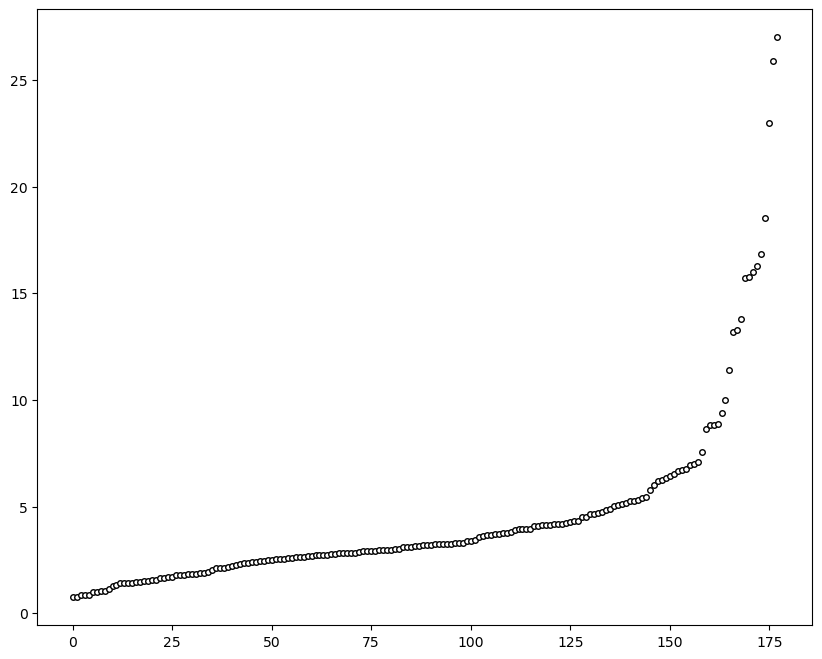

2.243417847989544 [ 0.47555833  0.22841682  0.29613395 -0.06107597  0.38135273  0.05087696
 -0.00534245 -0.01171216  0.00736179  0.47979583 -0.25706605 -0.18694909
  0.38829011]


In [17]:
N = len(X0)
alpha = (N - 20) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=alpha)
a3, L3 = pca.find_rob_pc(X3, wma)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X3, a3)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L2, a2)
U3 = pca.project_line(X0, a3)
U3_0 = pca.project_line(X0, a3_0)

In [18]:
X4_0 = pca.project(X3_0, a3_0)
X4 = pca.project(X3, a3)

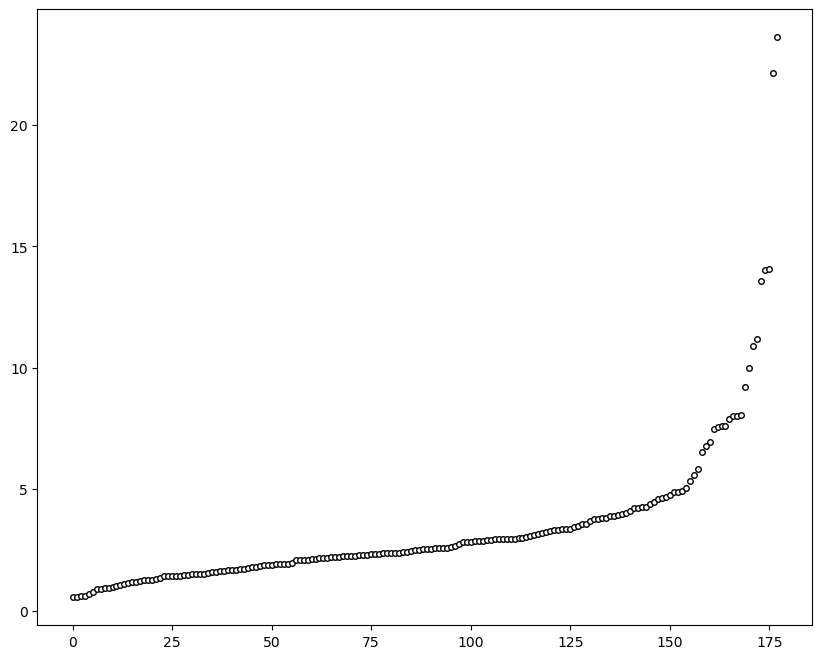

0.9189739237528227 [-0.01785624  0.53689027 -0.21417556  0.06085938 -0.35179672  0.19806837
  0.15229481 -0.20330093  0.3990565   0.0659257  -0.42777138  0.18412076
 -0.23207083]


In [19]:
a4_0, L4_0 = pca.find_pc(X4_0)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X4_0, a4_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L4_0, a4_0)

0.8876404494382022


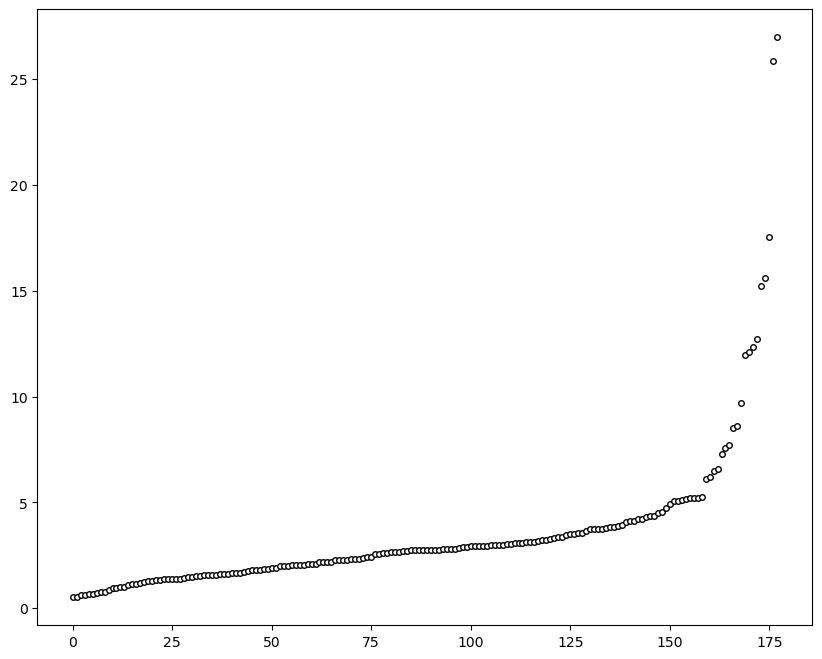

0.7666191076036115 [ 0.19928371 -0.35358493 -0.0219883  -0.29241943  0.07347939 -0.16530731
 -0.12165777  0.48746594 -0.34769435 -0.06521992  0.50119942 -0.19677789
  0.22148209]


In [20]:
N = len(X0)
alpha = (N - 20) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=alpha)
a4, L4 = pca.find_rob_pc(X4, wma)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X4, a4)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L4, a4)
U4 = pca.project_line(X0, a4)
U4_0 = pca.project_line(X0, a4_0)

In [21]:
X5_0 = pca.project(X4_0, a4_0)
X5 = pca.project(X4, a4)

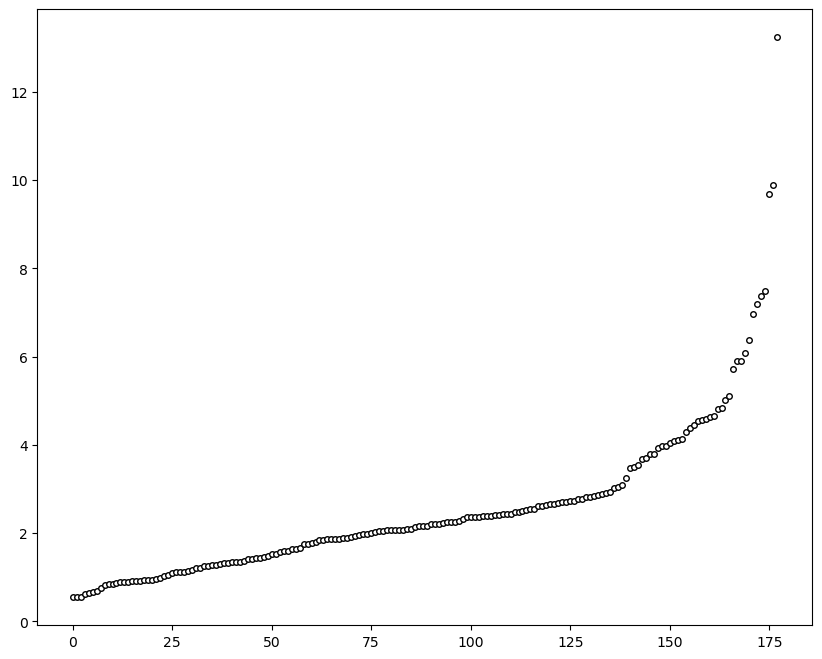

0.8532281783543193 [ 0.26566364 -0.03521376  0.1430255  -0.06610295 -0.72704845  0.14931838
  0.10902581  0.50070304 -0.13685986  0.07643679  0.1736146   0.10116094
  0.15786884]


In [22]:
a5_0, L5_0 = pca.find_pc(X5_0)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X5_0, a5_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L5_0, a5_0)

0.8876404494382022


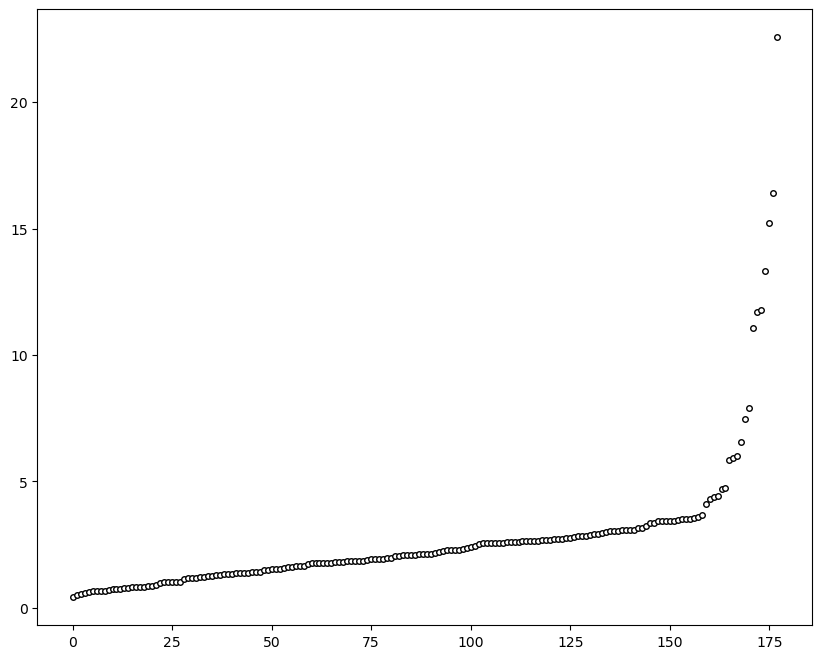

0.6874641833166084 [ 0.20030339  0.34913128 -0.11491471 -0.05357698 -0.57120508  0.12769089
  0.11230833  0.56356177  0.31190731  0.10315125 -0.0242308   0.1619543
  0.1198837 ]


In [23]:
N = len(X0)
alpha = (N - 20) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=alpha)
a5, L5 = pca.find_rob_pc(X5, wma)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X5, a5)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L5, a5)
U5 = pca.project_line(X0, a5)
U5_0 = pca.project_line(X0, a5_0)

In [24]:
from sklearn.decomposition import PCA

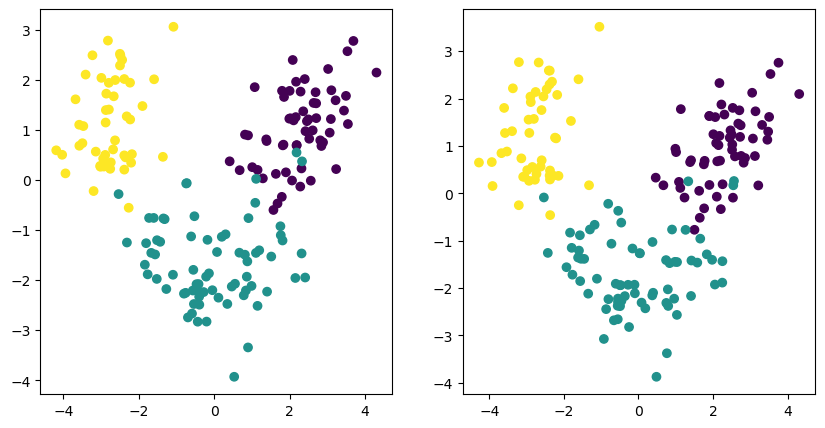

In [50]:
pca1 = PCA()
pca1.fit(X0)
U = pca1.transform(X0)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(U1, U2, c=Y)
plt.subplot(1,2,2)
plt.scatter(U[:,0], -U[:,1], c=Y)
plt.show()

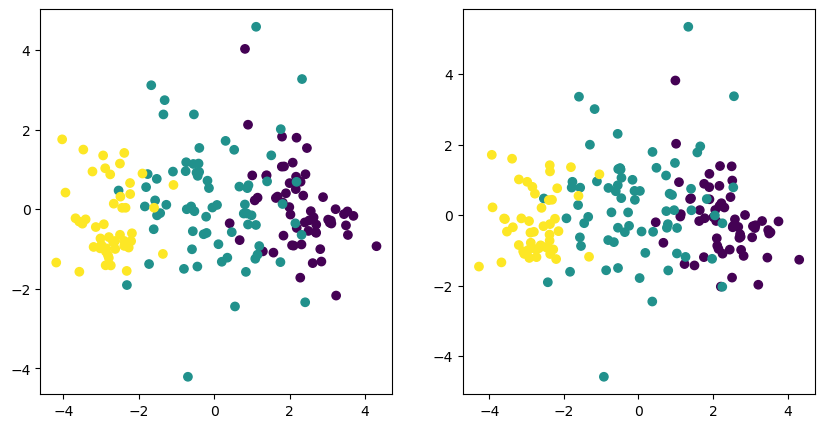

In [51]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(U1, U3, c=Y)
plt.subplot(1,2,2)
plt.scatter(U[:,0], U[:,2], c=Y)
plt.show()

In [27]:
As_0, Ls_0, Us_0 = find_pc_all(X1_0)

In [40]:
N = len(X0)
alpha = (N - 20) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.001), alpha=alpha)
As, Ls, Us = find_rob_pc_all(X1, wma)

0.8876404494382022


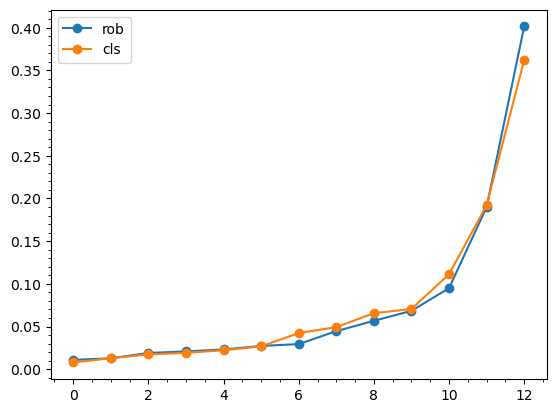

In [41]:
plt.plot(sorted(Ls/Ls.sum()), marker='o', label='rob')
plt.plot(sorted(Ls_0/Ls_0.sum()), marker='o', label='cls')
plt.legend()
plt.minorticks_on()
plt.show()

In [42]:
Vs = np.array([np.var(U) for U in Us])
Vs_0 = np.array([np.var(U) for U in Us_0])
Vs /= Vs.sum()
Vs_0 /= Vs_0.sum()

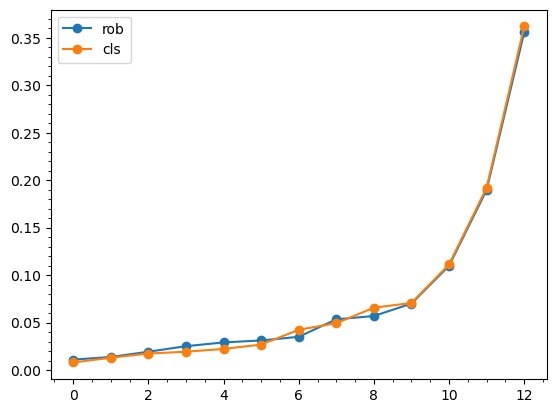

In [43]:
plt.plot(sorted(Vs), marker='o', label='rob')
plt.plot(sorted(Vs_0), marker='o', label='cls')
plt.legend()
plt.minorticks_on()
plt.show()

In [44]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [48]:
S = robust_scatter_matrix(X1, wma)
# print(S)

In [49]:
L, A = np.linalg.eig(S)
# print(A)
print(L/L.sum())

[0.34480778 0.13347941 0.11208188 0.08932816 0.07881752 0.07484204
 0.00382249 0.00690471 0.01167033 0.01865011 0.05082278 0.03565056
 0.03912223]
